## Import the libraries

In [1]:
import autolens as al
import autolens.plot as aplt
%matplotlib inline


## Create source galaxy

In [2]:
light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, bulge=light_profile)

## Create linear mass profile

In [3]:
mass_profiles_array = []
for i in range(-15,6):
    mass_profiles_array.append(al.mp.PointMass(centre=(0.1*i, 0), einstein_radius=1.0))
    


In [4]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass_profile_1 = mass_profiles_array[0],
    mass_profile_2= mass_profiles_array[1],
    mass_profile_3= mass_profiles_array[2],
    mass_profile_4= mass_profiles_array[3],
    mass_profile_5= mass_profiles_array[4],
    mass_profile_6= mass_profiles_array[5],
    mass_profile_7= mass_profiles_array[6],
    mass_profile_8= mass_profiles_array[7],
    mass_profile_9= mass_profiles_array[8],
    mass_profile_10= mass_profiles_array[9],
    mass_profile_11= mass_profiles_array[10],
    mass_profile_12= mass_profiles_array[11],
    mass_profile_13= mass_profiles_array[12],
    mass_profile_14= mass_profiles_array[13],
    mass_profile_15= mass_profiles_array[14],
    mass_profile_16= mass_profiles_array[15],
    mass_profile_17= mass_profiles_array[16],
    mass_profile_18= mass_profiles_array[17],
    mass_profile_19= mass_profiles_array[18],
    mass_profile_20= mass_profiles_array[19],

)


## Define the image plane

In [5]:
image_plane_grid = al.Grid2D.uniform(
    shape_native=(200, 200), pixel_scales=0.05, sub_size=1
)

## Image plane

In [6]:
image_plane = al.Plane(galaxies=[lens_galaxy])

## Lets have a look at the deflection caused by the lens galaxy

In [7]:
deflections = image_plane.deflections_from_grid(grid=image_plane_grid)

print("deflection-angles of `Plane`'s `Grid2D` pixel 0:")
print(deflections.native[0, 0, 0])
print(deflections.native[0, 0, 0])

print("deflection-angles of `Plane`'s `Grid2D` pixel 1:")
print(deflections.native[0, 1, 1])
print(deflections.native[0, 1, 1])

deflection-angles of `Plane`'s `Grid2D` pixel 0:
1.989387765003816
1.989387765003816
deflection-angles of `Plane`'s `Grid2D` pixel 1:
-1.811384645022413
-1.811384645022413


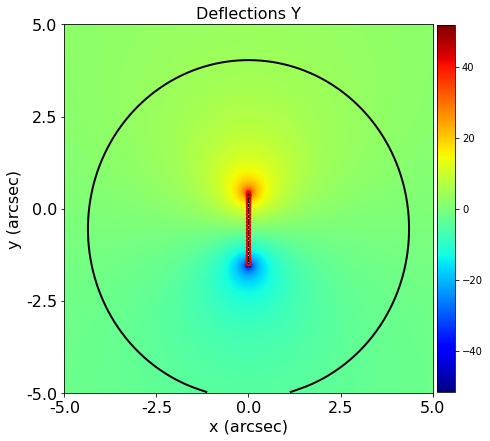

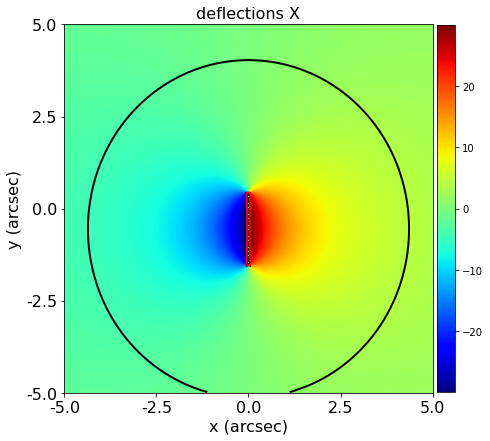

In [8]:
plane_plotter = aplt.PlanePlotter(plane=image_plane, grid=image_plane_grid)
plane_plotter.figures(deflections_y=True, deflections_x=True)

## The source plane grid

The source grid is changed due to the gravitational feild of the lens galaxy i.e the linear mass density

In [9]:
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)
print("Traced source-plane coordinates of `Grid2D` pixel 0:")
print(source_plane_grid.native[0, 0, :])
print("Traced source-plane coordinates of `Grid2D` pixel 1:")
print(source_plane_grid.native[0, 1, :])

Traced source-plane coordinates of `Grid2D` pixel 0:
[ 2.98561223 -3.16194942]
Traced source-plane coordinates of `Grid2D` pixel 1:
[ 2.96748293 -3.11361535]


In [10]:
source_plane = al.Plane(galaxies=[source_galaxy])

you can see in the plot that the sorce plane has changed due to the lensing effect by the linear mass density

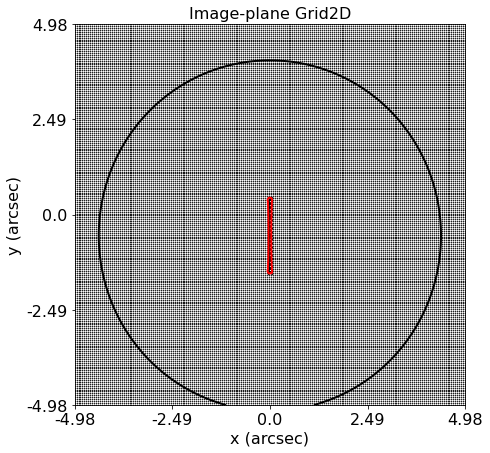

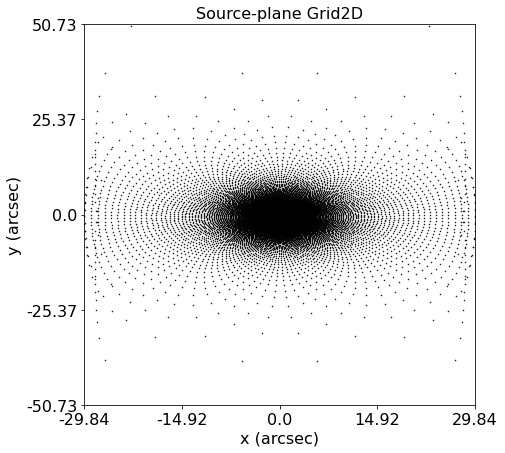

In [11]:
mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Image-plane Grid2D"))

plane_plotter = aplt.PlanePlotter(
    plane=image_plane, grid=image_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures(plane_grid=True)

mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Source-plane Grid2D"))

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures(plane_grid=True)

## Source galaxy from observer's POV

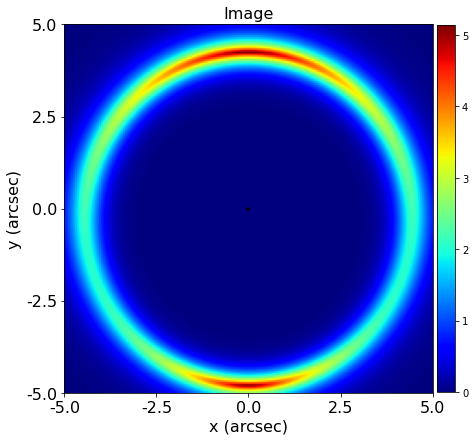

In [12]:
plane_plotter = aplt.PlanePlotter(plane=source_plane, grid=source_plane_grid)
plane_plotter.figures(image=True)

## Source galaxy (Actual image)

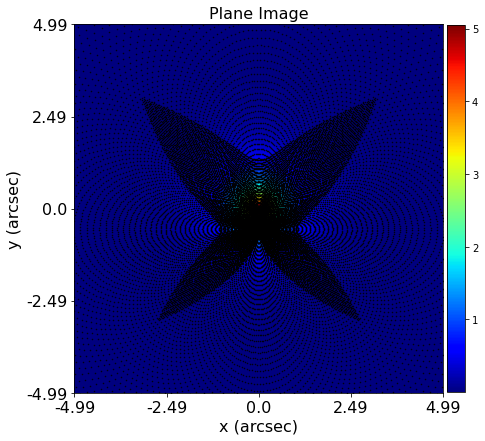

In [13]:
include_2d = aplt.Include2D(grid=True)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, include_2d=include_2d
)
plane_plotter.figures(plane_image=True)

The source grid is overlapped with the original image of source galaxy. We can remove it easly and see what the source galaxy actually looks like

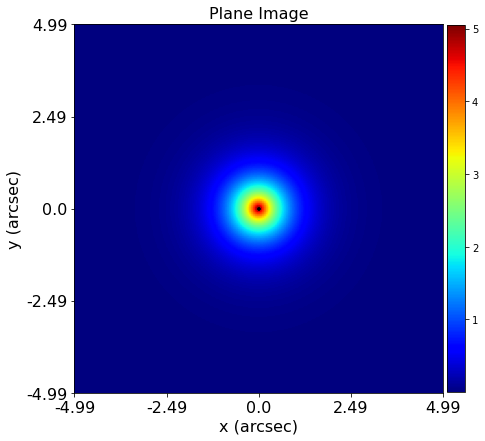

In [14]:
include_2d = aplt.Include2D(grid=False)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, include_2d=include_2d
)
plane_plotter.figures(plane_image=True)